In [1]:
import os
import json
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import TruncatedSVD
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from openTSNE import TSNE
import umap
PATH = "./sample_data/"
%matplotlib inline

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\Yernar-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Yernar-
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_json("./TopicModeling.json")

In [4]:
def preprocess_text(text, flag):
    text = text.lower()
    text = text.replace("abstract:","")
    text = re.sub("[^A-Za-z]+"," ",text)
    if flag:
        tokens = nltk.word_tokenize(text)
        tokens = [token for token in tokens if not token in stopwords.words("english")]
        text = " ".join(tokens)
    return text
        

In [5]:
df['cleaned_abstract'] = df['abstract'].apply(lambda x: preprocess_text(x,True))

In [6]:
df.head()

,url,title,date_publ,authors,abstract,categories,url_pdf,cleaned_abstract
0,https://arxiv.org/abs/2202.03622,Title:The synergistic modulation of electronic...,8 Feb 2022,"[Linfeng Yu, Jinyuan Xu, Chen Shen, E Zhou, Ji...",Abstract: The design of novel devices with sp...,[Materials Science (cond-mat.mtrl-sci)],/pdf/2202.03622,design novel devices specific technical intere...
1,https://arxiv.org/abs/2202.02773,Title:Probing Cosmic Inflation with the LiteBI...,6 Feb 2022,"[LiteBIRD Collaboration: E. Allys, K. Arnold, ...","Abstract: LiteBIRD, the Lite (Light) satellit...",[Instrumentation and Methods for Astrophysics ...,/pdf/2202.02773,litebird lite light satellite study b mode pol...
2,https://arxiv.org/abs/2202.02429,Title:Verifying Inverse Model Neural Networks,4 Feb 2022,"[Chelsea Sidrane, Sydney Katz, Anthony Corso, ...",Abstract: Inverse problems exist in a wide va...,"[Machine Learning (cs.LG), Logic in Computer ...",/pdf/2202.02429,inverse problems exist wide variety physical d...
3,https://arxiv.org/abs/2202.01203,Title:High pressure induced precipitation in A...,2 Feb 2022,"[Abhinav Parakh, Andrew C. Lee, Stella Charito...",Abstract: Precipitate-matrix interactions gov...,"[Materials Science (cond-mat.mtrl-sci), Other...",/pdf/2202.01203,precipitate matrix interactions govern mechani...
4,https://arxiv.org/abs/2202.00791,Title:Mars Terrain Segmentation with Less Labels,1 Feb 2022,"[Edwin Goh, Jingdao Chen, Brian Wilso]",Abstract: Planetary rover systems need to per...,[Computer Vision and Pattern Recognition (cs.C...,/pdf/2202.00791,planetary rover systems need perform terrain s...


In [7]:
vecr = TfidfVectorizer(min_df=5, max_df=0.95)
X = vecr.fit_transform(df["cleaned_abstract"])

In [8]:
kmeans = KMeans(n_clusters=5,random_state=111)
kmeans.fit(X)


KMeans(n_clusters=5, random_state=111)

### TSNE

In [9]:
from sklearn.manifold import TSNE
tsne = TSNE(init = 'random', n_components=2, verbose=1, perplexity=10, n_iter=3000,random_state=111 )
tsne_results = tsne.fit_transform(X)

C:\Users\Yernar-PC\anaconda3\envs\tf\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 4317 samples in 0.000s...
[t-SNE] Computed neighbors for 4317 samples in 0.959s...
[t-SNE] Computed conditional probabilities for sample 1000 / 4317
[t-SNE] Computed conditional probabilities for sample 2000 / 4317
[t-SNE] Computed conditional probabilities for sample 3000 / 4317
[t-SNE] Computed conditional probabilities for sample 4000 / 4317
[t-SNE] Computed conditional probabilities for sample 4317 / 4317
[t-SNE] Mean sigma: 0.263447
[t-SNE] KL divergence after 250 iterations with early exaggeration: 98.124062
[t-SNE] KL divergence after 3000 iterations: 1.743294


In [10]:
df['y'] = tsne_results[:,0]
df['x'] = tsne_results[:,1]
df

,url,title,date_publ,authors,abstract,categories,url_pdf,cleaned_abstract,y,x
0,https://arxiv.org/abs/2202.03622,Title:The synergistic modulation of electronic...,8 Feb 2022,"[Linfeng Yu, Jinyuan Xu, Chen Shen, E Zhou, Ji...",Abstract: The design of novel devices with sp...,[Materials Science (cond-mat.mtrl-sci)],/pdf/2202.03622,design novel devices specific technical intere...,-82.819893,-47.515858
1,https://arxiv.org/abs/2202.02773,Title:Probing Cosmic Inflation with the LiteBI...,6 Feb 2022,"[LiteBIRD Collaboration: E. Allys, K. Arnold, ...","Abstract: LiteBIRD, the Lite (Light) satellit...",[Instrumentation and Methods for Astrophysics ...,/pdf/2202.02773,litebird lite light satellite study b mode pol...,43.492859,9.287042
2,https://arxiv.org/abs/2202.02429,Title:Verifying Inverse Model Neural Networks,4 Feb 2022,"[Chelsea Sidrane, Sydney Katz, Anthony Corso, ...",Abstract: Inverse problems exist in a wide va...,"[Machine Learning (cs.LG), Logic in Computer ...",/pdf/2202.02429,inverse problems exist wide variety physical d...,-96.354126,70.384071
3,https://arxiv.org/abs/2202.01203,Title:High pressure induced precipitation in A...,2 Feb 2022,"[Abhinav Parakh, Andrew C. Lee, Stella Charito...",Abstract: Precipitate-matrix interactions gov...,"[Materials Science (cond-mat.mtrl-sci), Other...",/pdf/2202.01203,precipitate matrix interactions govern mechani...,-72.826447,-36.684887
4,https://arxiv.org/abs/2202.00791,Title:Mars Terrain Segmentation with Less Labels,1 Feb 2022,"[Edwin Goh, Jingdao Chen, Brian Wilso]",Abstract: Planetary rover systems need to per...,[Computer Vision and Pattern Recognition (cs.C...,/pdf/2202.00791,planetary rover systems need perform terrain s...,-84.045357,20.966101
...,...,...,...,...,...,...,...,...,...,...
4312,https://arxiv.org/abs/2011.00110,Title:Extended-body motion in black hole space...,"30 Oct 2020 (v1), last revised 22 Dec 2020 (th...",[Abraham I. Hart],Abstract: Free-fall is only approximately uni...,[General Relativity and Quantum Cosmology (gr-...,/pdf/2011.00110,free fall approximately universal general rela...,-26.530783,89.783920
4313,https://arxiv.org/abs/2010.15544,Title:Algorithm for TDI numerical simulation a...,"29 Oct 2020 (v1), last revised 3 Jun 2021 (thi...","[Gang Wang, Wei-Tou Ni, Wen-Biao Han, Cong-Fen...",Abstract: We introduce a generic algorithm to...,[General Relativity and Quantum Cosmology (gr-...,/pdf/2010.15544,introduce generic algorithm determine time del...,-16.122984,119.763985
4314,https://arxiv.org/abs/2010.14185,Title:In-flight calibration system of Imaging ...,27 Oct 2020,"[Riccardo Ferrazzoli, Fabio Muleri, Carlo Lefe...",Abstract: The NASA/ASI Imaging X-ray Polarime...,[Instrumentation and Methods for Astrophysics ...,/pdf/2010.14185,nasa asi imaging x ray polarimetry explorer la...,82.043259,-16.292049
4315,https://arxiv.org/abs/2010.13740,Title:Possible Transient Luminous Events obser...,26 Oct 2020,"[Rohini S. Giles, Thomas K. Greathouse, Bertra...",Abstract: 11 transient bright flashes were de...,[Earth and Planetary Astrophysics (astro-ph.EP)],/pdf/2010.13740,transient bright flashes detected jupiter atmo...,55.217587,-25.015676


In [11]:
clusters = kmeans.labels_
df['cluster'] = clusters
df

,url,title,date_publ,authors,abstract,categories,url_pdf,cleaned_abstract,y,x,cluster
0,https://arxiv.org/abs/2202.03622,Title:The synergistic modulation of electronic...,8 Feb 2022,"[Linfeng Yu, Jinyuan Xu, Chen Shen, E Zhou, Ji...",Abstract: The design of novel devices with sp...,[Materials Science (cond-mat.mtrl-sci)],/pdf/2202.03622,design novel devices specific technical intere...,-82.819893,-47.515858,2
1,https://arxiv.org/abs/2202.02773,Title:Probing Cosmic Inflation with the LiteBI...,6 Feb 2022,"[LiteBIRD Collaboration: E. Allys, K. Arnold, ...","Abstract: LiteBIRD, the Lite (Light) satellit...",[Instrumentation and Methods for Astrophysics ...,/pdf/2202.02773,litebird lite light satellite study b mode pol...,43.492859,9.287042,2
2,https://arxiv.org/abs/2202.02429,Title:Verifying Inverse Model Neural Networks,4 Feb 2022,"[Chelsea Sidrane, Sydney Katz, Anthony Corso, ...",Abstract: Inverse problems exist in a wide va...,"[Machine Learning (cs.LG), Logic in Computer ...",/pdf/2202.02429,inverse problems exist wide variety physical d...,-96.354126,70.384071,2
3,https://arxiv.org/abs/2202.01203,Title:High pressure induced precipitation in A...,2 Feb 2022,"[Abhinav Parakh, Andrew C. Lee, Stella Charito...",Abstract: Precipitate-matrix interactions gov...,"[Materials Science (cond-mat.mtrl-sci), Other...",/pdf/2202.01203,precipitate matrix interactions govern mechani...,-72.826447,-36.684887,1
4,https://arxiv.org/abs/2202.00791,Title:Mars Terrain Segmentation with Less Labels,1 Feb 2022,"[Edwin Goh, Jingdao Chen, Brian Wilso]",Abstract: Planetary rover systems need to per...,[Computer Vision and Pattern Recognition (cs.C...,/pdf/2202.00791,planetary rover systems need perform terrain s...,-84.045357,20.966101,2
...,...,...,...,...,...,...,...,...,...,...,...
4312,https://arxiv.org/abs/2011.00110,Title:Extended-body motion in black hole space...,"30 Oct 2020 (v1), last revised 22 Dec 2020 (th...",[Abraham I. Hart],Abstract: Free-fall is only approximately uni...,[General Relativity and Quantum Cosmology (gr-...,/pdf/2011.00110,free fall approximately universal general rela...,-26.530783,89.783920,0
4313,https://arxiv.org/abs/2010.15544,Title:Algorithm for TDI numerical simulation a...,"29 Oct 2020 (v1), last revised 3 Jun 2021 (thi...","[Gang Wang, Wei-Tou Ni, Wen-Biao Han, Cong-Fen...",Abstract: We introduce a generic algorithm to...,[General Relativity and Quantum Cosmology (gr-...,/pdf/2010.15544,introduce generic algorithm determine time del...,-16.122984,119.763985,0
4314,https://arxiv.org/abs/2010.14185,Title:In-flight calibration system of Imaging ...,27 Oct 2020,"[Riccardo Ferrazzoli, Fabio Muleri, Carlo Lefe...",Abstract: The NASA/ASI Imaging X-ray Polarime...,[Instrumentation and Methods for Astrophysics ...,/pdf/2010.14185,nasa asi imaging x ray polarimetry explorer la...,82.043259,-16.292049,1
4315,https://arxiv.org/abs/2010.13740,Title:Possible Transient Luminous Events obser...,26 Oct 2020,"[Rohini S. Giles, Thomas K. Greathouse, Bertra...",Abstract: 11 transient bright flashes were de...,[Earth and Planetary Astrophysics (astro-ph.EP)],/pdf/2010.13740,transient bright flashes detected jupiter atmo...,55.217587,-25.015676,1


In [12]:
len(list(clusters))

4317

In [13]:
def interpret(n):
    res = dict()
    centroids = pd.DataFrame(X.todense()).groupby(clusters).mean()
    terms = vecr.get_feature_names_out()
    for i,r in centroids.iterrows():
        res[i] = ",".join([terms[t] for t in np.argsort(r)[-n:]])
    return res

In [14]:
cluster_map = interpret(3)
df['cluster'] = df['cluster'].map(cluster_map)

In [15]:
df[["title","categories","cluster"]].head()

,title,categories,cluster
0,Title:The synergistic modulation of electronic...,[Materials Science (cond-mat.mtrl-sci)],"space,system,control"
1,Title:Probing Cosmic Inflation with the LiteBI...,[Instrumentation and Methods for Astrophysics ...,"space,system,control"
2,Title:Verifying Inverse Model Neural Networks,"[Machine Learning (cs.LG), Logic in Computer ...","space,system,control"
3,Title:High pressure induced precipitation in A...,"[Materials Science (cond-mat.mtrl-sci), Other...","solar,dust,ray"
4,Title:Mars Terrain Segmentation with Less Labels,[Computer Vision and Pattern Recognition (cs.C...,"space,system,control"


### Best result fot umap is with default params

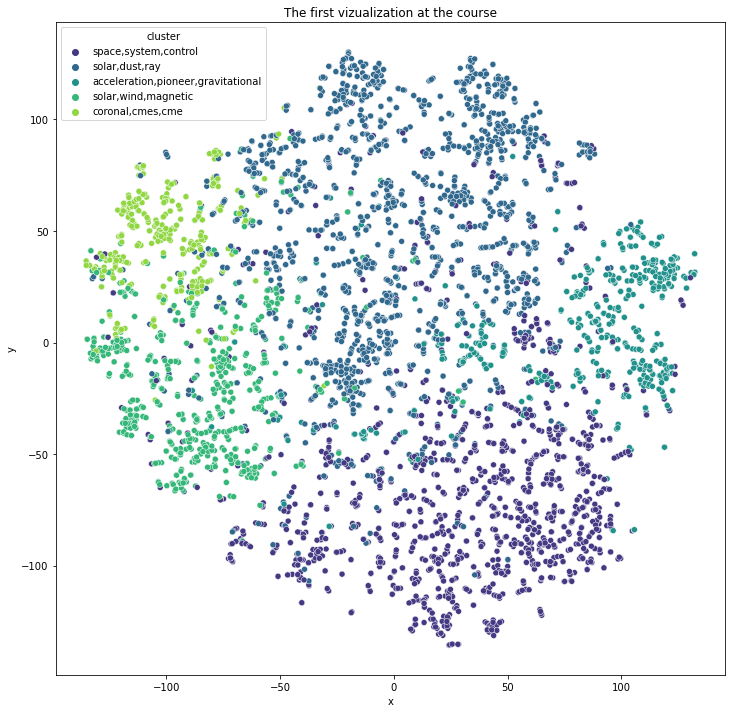

In [16]:
plt.figure(figsize=(12,12))
plt.title("The first vizualization at the course")
sns.scatterplot(data=df,y='y',x='x', hue='cluster',palette='viridis');

In [17]:
df['date_publ'].unique().shape

(3417,)

In [18]:
df

,url,title,date_publ,authors,abstract,categories,url_pdf,cleaned_abstract,y,x,cluster
0,https://arxiv.org/abs/2202.03622,Title:The synergistic modulation of electronic...,8 Feb 2022,"[Linfeng Yu, Jinyuan Xu, Chen Shen, E Zhou, Ji...",Abstract: The design of novel devices with sp...,[Materials Science (cond-mat.mtrl-sci)],/pdf/2202.03622,design novel devices specific technical intere...,-82.819893,-47.515858,"space,system,control"
1,https://arxiv.org/abs/2202.02773,Title:Probing Cosmic Inflation with the LiteBI...,6 Feb 2022,"[LiteBIRD Collaboration: E. Allys, K. Arnold, ...","Abstract: LiteBIRD, the Lite (Light) satellit...",[Instrumentation and Methods for Astrophysics ...,/pdf/2202.02773,litebird lite light satellite study b mode pol...,43.492859,9.287042,"space,system,control"
2,https://arxiv.org/abs/2202.02429,Title:Verifying Inverse Model Neural Networks,4 Feb 2022,"[Chelsea Sidrane, Sydney Katz, Anthony Corso, ...",Abstract: Inverse problems exist in a wide va...,"[Machine Learning (cs.LG), Logic in Computer ...",/pdf/2202.02429,inverse problems exist wide variety physical d...,-96.354126,70.384071,"space,system,control"
3,https://arxiv.org/abs/2202.01203,Title:High pressure induced precipitation in A...,2 Feb 2022,"[Abhinav Parakh, Andrew C. Lee, Stella Charito...",Abstract: Precipitate-matrix interactions gov...,"[Materials Science (cond-mat.mtrl-sci), Other...",/pdf/2202.01203,precipitate matrix interactions govern mechani...,-72.826447,-36.684887,"solar,dust,ray"
4,https://arxiv.org/abs/2202.00791,Title:Mars Terrain Segmentation with Less Labels,1 Feb 2022,"[Edwin Goh, Jingdao Chen, Brian Wilso]",Abstract: Planetary rover systems need to per...,[Computer Vision and Pattern Recognition (cs.C...,/pdf/2202.00791,planetary rover systems need perform terrain s...,-84.045357,20.966101,"space,system,control"
...,...,...,...,...,...,...,...,...,...,...,...
4312,https://arxiv.org/abs/2011.00110,Title:Extended-body motion in black hole space...,"30 Oct 2020 (v1), last revised 22 Dec 2020 (th...",[Abraham I. Hart],Abstract: Free-fall is only approximately uni...,[General Relativity and Quantum Cosmology (gr-...,/pdf/2011.00110,free fall approximately universal general rela...,-26.530783,89.783920,"acceleration,pioneer,gravitational"
4313,https://arxiv.org/abs/2010.15544,Title:Algorithm for TDI numerical simulation a...,"29 Oct 2020 (v1), last revised 3 Jun 2021 (thi...","[Gang Wang, Wei-Tou Ni, Wen-Biao Han, Cong-Fen...",Abstract: We introduce a generic algorithm to...,[General Relativity and Quantum Cosmology (gr-...,/pdf/2010.15544,introduce generic algorithm determine time del...,-16.122984,119.763985,"acceleration,pioneer,gravitational"
4314,https://arxiv.org/abs/2010.14185,Title:In-flight calibration system of Imaging ...,27 Oct 2020,"[Riccardo Ferrazzoli, Fabio Muleri, Carlo Lefe...",Abstract: The NASA/ASI Imaging X-ray Polarime...,[Instrumentation and Methods for Astrophysics ...,/pdf/2010.14185,nasa asi imaging x ray polarimetry explorer la...,82.043259,-16.292049,"solar,dust,ray"
4315,https://arxiv.org/abs/2010.13740,Title:Possible Transient Luminous Events obser...,26 Oct 2020,"[Rohini S. Giles, Thomas K. Greathouse, Bertra...",Abstract: 11 transient bright flashes were de...,[Earth and Planetary Astrophysics (astro-ph.EP)],/pdf/2010.13740,transient bright flashes detected jupiter atmo...,55.217587,-25.015676,"solar,dust,ray"


### Lets group by month

In [19]:
data = df[["date_publ","x","y","cluster"]]
data["date_publ"] = data["date_publ"].apply(lambda x: " ".join(x.split()[1:-1]))
grouped = data.groupby("date_publ")
grouped.first()

C:\Users\Yernar-PC\AppData\Local\Temp\ipykernel_13492\2744421880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["date_publ"] = data["date_publ"].apply(lambda x: " ".join(x.split()[1:-1]))


,x,y,cluster
date_publ,,,
Apr,-47.774326,-82.136070,"solar,dust,ray"
"Apr 1999 (v1), last revised 13 Apr 1999 (this version,",113.637199,34.914497,"acceleration,pioneer,gravitational"
"Apr 1999 (v1), last revised 3 Dec 2013 (this version,",-17.169327,-41.047581,"acceleration,pioneer,gravitational"
"Apr 2001 (v1), last revised 10 Mar 2005 (this version,",115.139053,36.963913,"acceleration,pioneer,gravitational"
"Apr 2005 (v1), last revised 1 Jun 2006 (this version,",120.875298,25.996885,"acceleration,pioneer,gravitational"
...,...,...,...
"Sep 2021 (v1), last revised 29 Sep 2021 (this version,",-81.572624,41.987152,"solar,dust,ray"
"Sep 2021 (v1), last revised 30 Nov 2021 (this version,",-112.961067,52.137753,"coronal,cmes,cme"
"Sep 2021 (v1), last revised 4 Jan 2022 (this version,",-106.535973,44.454868,"coronal,cmes,cme"


In [22]:
out = grouped.first().to_json(orient='records')
with open('group_tsne.json', 'w') as f:
    f.write(out)

### Saving data

In [20]:
data = df[["date_publ","x","y","cluster"]]

out = data.to_json(orient='records')
with open('TSNE.json', 'w') as f:
    f.write(out)